# Work with model

In [3]:
import vertexai
from vertexai import model_garden
from google.cloud import aiplatform

vertexai.init(project="qwiklabs-asl-03-28f1b57bf3df", 
              location="us-central1")

In [7]:
vertexai

<module 'vertexai' from '/opt/conda/lib/python3.10/site-packages/vertexai/__init__.py'>

In [4]:
from PIL import Image
from io import BytesIO
import base64

def base64_to_image(image_str):
    """Convert base64 encoded string to an image."""
    image = Image.open(BytesIO(base64.b64decode(image_str)))
    return image

In [6]:
# flux_endpoint_resource_url="projects/157385553049/locations/us-central1/endpoints/YOUR_ENDPOINT_ID"
flux_endpoint_resource_url="projects/157385553049/locations/us-central1/endpoints/6885927963947171840"

flux_endpoint=aiplatform.Endpoint(flux_endpoint_resource_url)

In [8]:
flux_endpoint

resource name: projects/157385553049/locations/us-central1/endpoints/6885927963947171840

In [9]:
text = "An oil painting of a robot holding an umbrella over a kid in the rain." 
height = 1024  
width = 1024  
num_inference_steps = 4 

instances = [{"text": text}]
parameters = {
    "height": height,
    "width": width,
    "num_inference_steps": num_inference_steps,
}
response = flux_endpoint.predict(
    instances=instances,
    parameters=parameters,
    use_dedicated_endpoint=True,
)

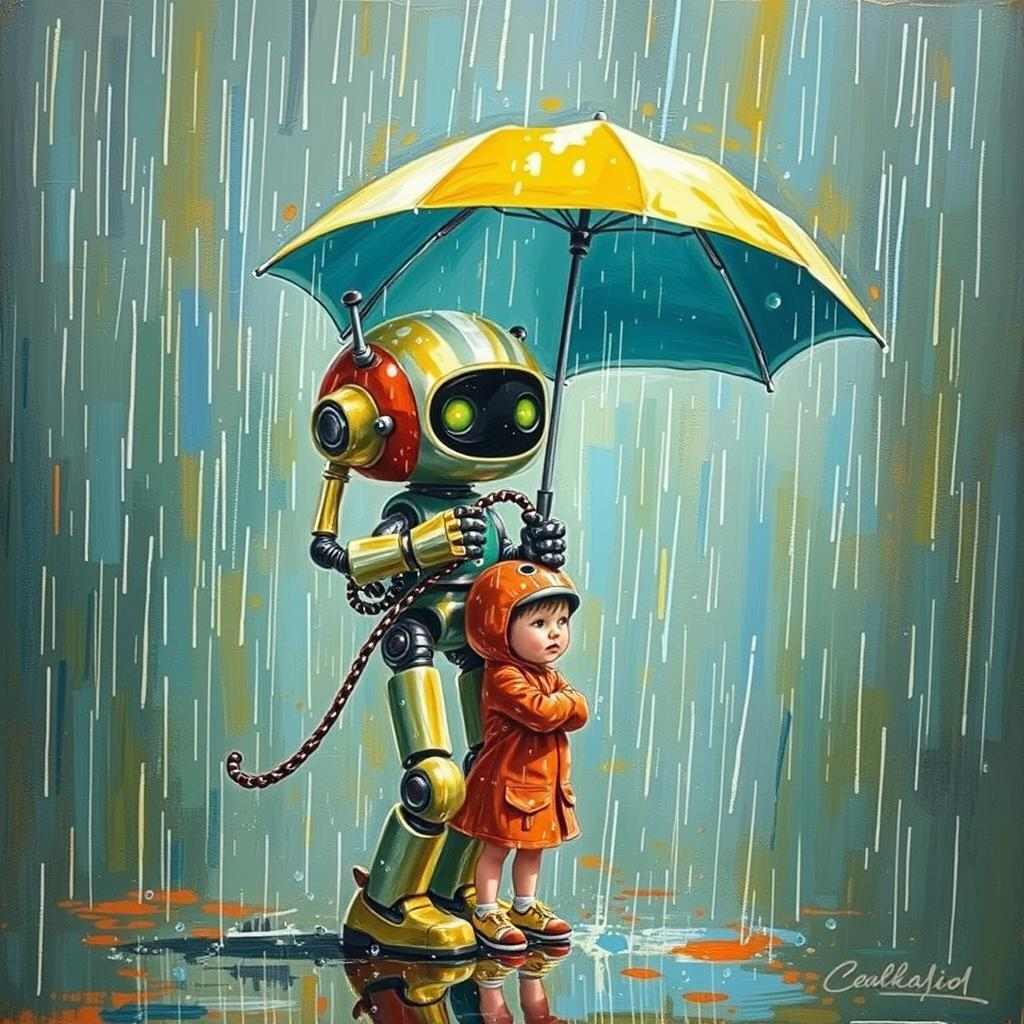

In [10]:
images=[
    base64_to_image(prediction.get("output"))
        for prediction in response.predictions
]
images[0].save("robot-and-kid.jpg")
display(images[0])

## Response

In [12]:
response

Prediction(predictions=[{'output': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAQABAADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDmhKDIznCkkMV61O26ONVMYk3rkZOAQe/HUe1Q/MrBxkqQVY5wQ3pUihljAZULDIZ1XGR71F7shqyJInlJkLzmHKE5QBVcZ+6RShGB5Pb+9mmhFKZx2wOKcoHYDr0ArZbGDJ4x

In [17]:
len(response.predictions)

1

In [15]:
type(response.predictions[0])

dict

In [16]:
response.predictions[0].keys()

dict_keys(['output', 'text'])

## Output

In [19]:
response.predictions[0]["output"]

'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAQABAADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDmhKDIznCkkMV61O26ONVMYk3rkZOAQe/HUe1Q/MrBxkqQVY5wQ3pUihljAZULDIZ1XGR71F7shqyJInlJkLzmHKE5QBVcZ+6RShGB5Pb+9mmhFKZx2wOKcoHYDr0ArZbGDJ4xxU6ck/SoY+vSpR0J9eM0Ei9utL2o6Y4/+tS

## Text

In [20]:
response.predictions[0]["text"]

'An oil painting of a robot holding an umbrella over a kid in the rain.'

## Images

In [21]:
images

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1024>]

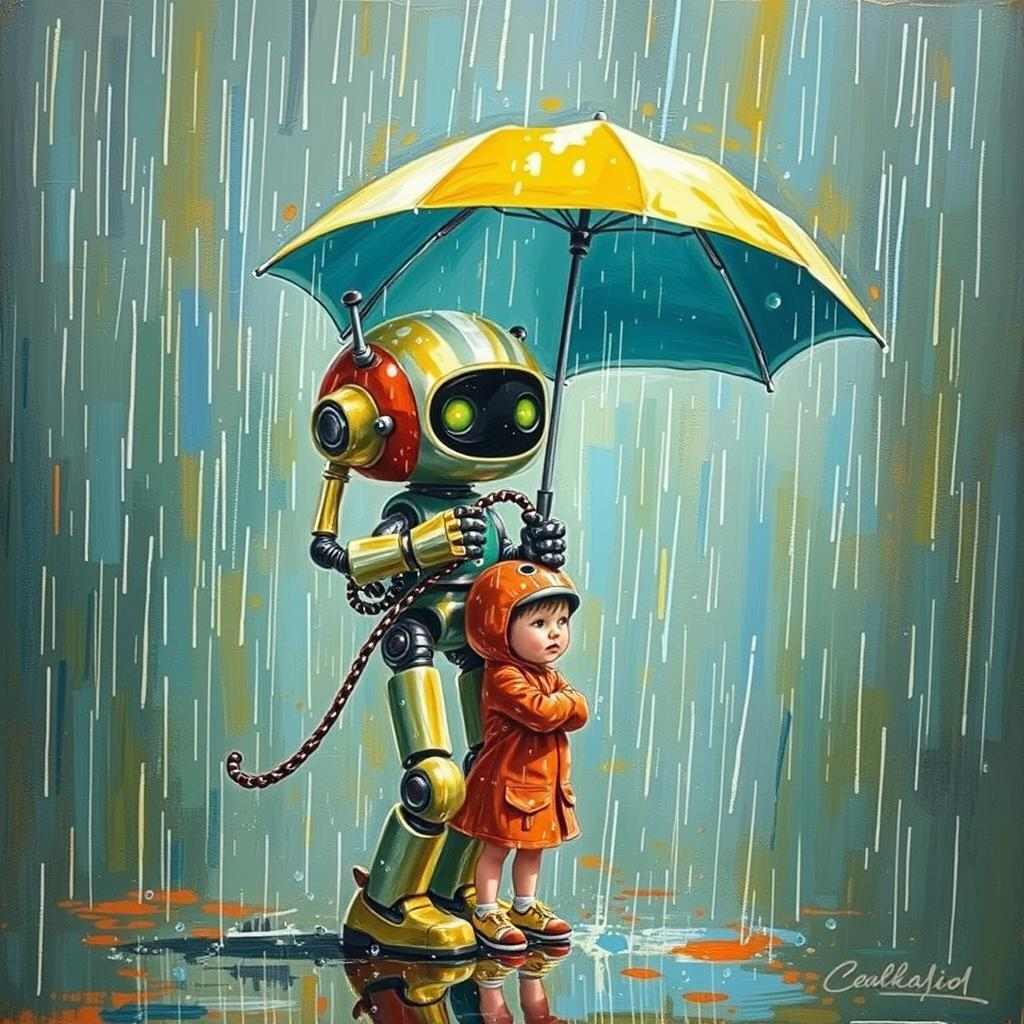

In [22]:
images[0]

# Clean up resources

In [11]:
endpoints = aiplatform.Endpoint.list()
endpoints

 resource name: projects/157385553049/locations/us-central1/endpoints/6885927963947171840]

In [24]:
endpoints[0].__dict__

{'project': '157385553049',
 'location': 'us-central1',
 'credentials': <google.auth.compute_engine.credentials.Credentials at 0x7f9617948400>,
 'api_client': <google.cloud.aiplatform.utils.EndpointClientWithOverride at 0x7f96157398d0>,
 '_FutureManager__latest_future_lock': <unlocked _thread.lock object at 0x7f96152e3b80>,
 '_FutureManager__latest_future': None,
 '_exception': None,
 '_gca_resource': name: "projects/157385553049/locations/us-central1/endpoints/6885927963947171840"
 display_name: "flux1-schnell-mg-one-click-deploy"
 deployed_models {
   id: "9095396579963043840"
   model: "projects/157385553049/locations/us-central1/models/flux1-schnell-1759825472543"
   display_name: "Flux"
   create_time {
     seconds: 1759825710
     nanos: 576315000
   }
   dedicated_resources {
     machine_spec {
       machine_type: "a2-ultragpu-1g"
       accelerator_type: NVIDIA_A100_80GB
       accelerator_count: 1
       reservation_affinity {
         reservation_affinity_type: NO_RESERVAT

In [25]:
models = aiplatform.Model.list()
models

 resource name: projects/157385553049/locations/us-central1/models/flux1-schnell-1759825472543]

In [26]:
models[0].__dict__

{'project': '157385553049',
 'location': 'us-central1',
 'credentials': <google.auth.compute_engine.credentials.Credentials at 0x7f9617948400>,
 'api_client': <google.cloud.aiplatform.utils.ModelClientWithOverride at 0x7f9615566f20>,
 '_FutureManager__latest_future_lock': <unlocked _thread.lock object at 0x7f96141ae800>,
 '_FutureManager__latest_future': None,
 '_exception': None,
 '_gca_resource': name: "projects/157385553049/locations/us-central1/models/flux1-schnell-1759825472543"
 display_name: "flux1-schnell-1759825472543"
 predict_schemata {
 }
 metadata {
 }
 container_spec {
   image_uri: "us-docker.pkg.dev/deeplearning-platform-release/vertex-model-garden/xdit-serve.cu125.0-2.ubuntu2204.py310:model-garden.xdit-0-2-release_20250803.00_p0"
   env {
     name: "DEPLOY_SOURCE"
     value: "UI_NATIVE_MODEL"
   }
   env {
     name: "MODEL_ID"
     value: "gs://vertex-model-garden-restricted-us/black-forest-labs/FLUX.1-schnell"
   }
   env {
     name: "TASK"
     value: "text-to-im

In [ ]:
if not endpoints:
    print("No endpoints found in this project/region.")
else:
    for endpoint in endpoints:
        print(f"\nEndpoint: {endpoint.display_name} ({endpoint.resource_name})")

        deployed_models = endpoint.list_models()
        for dm in deployed_models:
            print(f"  Undeploying model ID: {dm.id}")            
            endpoint.undeploy(deployed_model_id=dm.id, sync=True)
            print(f"  Undeployed model ID: {dm.id}")

        print("  Deleting endpoint...")
        endpoint.delete(sync=True)
        print(f"  Deleted endpoint: {endpoint.display_name}")

print("\nDeleting models...")
models = aiplatform.Model.list()

for model in models:
    print(f"  Deleting model: {model.display_name}")
    model.delete(sync=True)
    print("  Deleted.")
